# Handling Outliers

In [2]:
# Import Pandas Library
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import the data from .csv file
df = pd.read_csv('Life_Expectancy_Data.csv')

In [4]:
# you can view the first couple of rows using .head()
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [31]:
# You can drop NaN rows based on a threshold
# Retain all rows that has at least 18  NON-NaNs within it:
df_dropT = df.dropna(axis=0, thresh=18)

In [32]:
# Let's check if we still have any missing values
df_dropT.isnull().sum()

Year                                 0
Status                               0
Life expectancy                      3
Adult Mortality                      3
infant deaths                        0
Alcohol                            149
percentage expenditure               0
Hepatitis B                        488
Measles                              0
 BMI                                10
under-five deaths                    0
Polio                                7
Total expenditure                  154
Diphtheria                           7
 HIV/AIDS                            0
GDP                                260
Population                         467
 thinness  1-19 years               10
 thinness 5-9 years                 10
Income composition of resources      1
Schooling                            0
dtype: int64

In [ ]:
#The drop=True parameter tells Pandas not to keep a backup copy of the original index. 
df_dropT.reset_index(drop=True, inplace=True)
df_dropT

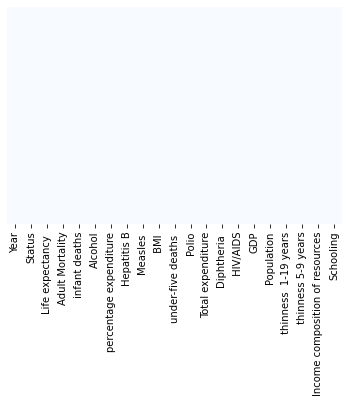

In [19]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [5]:
df.select_dtypes(include=['float64', 'int64']).skew()

Year                               -0.006409
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64

<Axes: >

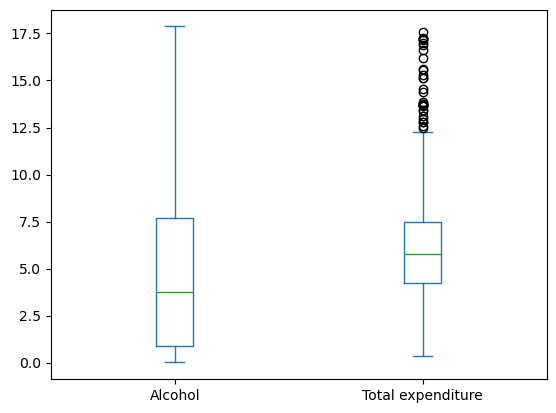

In [7]:
df[['Alcohol','Total expenditure']].plot.box()

<Axes: >

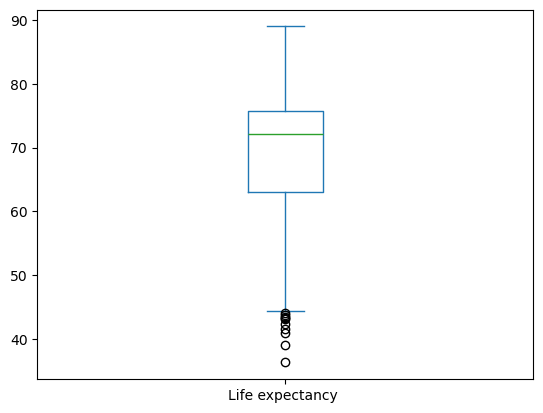

In [9]:
df['Life expectancy '].plot.box()

In [151]:
# Calculate Q1, Q3, and IQR
Q1 = df['Life expectancy '].quantile(0.25)
Q3 = df['Life expectancy '].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = df[(df['Life expectancy '] < lower_bound) | (df['Life expectancy '] > upper_bound)]

outliers

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1127,2010,Developing,36.3,682.0,23,5.76,36.292918,NaN,0,44.2,...,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1583,2002,Developing,44.0,67.0,46,1.10,3.885395,64.0,92,14.8,...,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1584,2001,Developing,43.5,599.0,48,1.15,12.797606,NaN,150,14.4,...,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
1585,2000,Developing,43.1,588.0,51,1.18,13.762702,NaN,304,14.1,...,73.0,6.70,75.0,25.5,153.259487,11376172.0,8.0,7.9,0.391,10.7
2307,2005,Developing,43.3,48.0,30,3.83,42.088929,NaN,29,19.2,...,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8
2308,2004,Developing,42.3,496.0,30,3.99,38.524548,NaN,7,18.8,...,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6
2309,2003,Developing,41.5,57.0,30,4.07,38.614732,NaN,586,18.4,...,66.0,11.69,73.0,1.9,263.761831,5199549.0,9.7,9.8,0.322,7.4
2311,2001,Developing,41.0,519.0,30,4.21,33.346915,NaN,649,17.5,...,38.0,11.83,38.0,1.5,227.779471,4739147.0,1.1,1.2,0.302,7.0
2312,2000,Developing,39.0,533.0,29,3.97,20.395683,NaN,3575,17.2,...,46.0,13.63,44.0,1.2,139.314773,4564297.0,1.3,1.4,0.292,6.7
2921,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [152]:
from scipy import stats
# Calculate Z-scores
df['Z_score'] = stats.zscore(df[df['Life expectancy '].isnull()==False]['Life expectancy '])

# Set threshold for outliers
outliers = df[df['Z_score'].abs() > 3]

outliers

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Z_score
1127,2010,Developing,36.3,682.0,23,5.76,36.292918,NaN,0,44.2,...,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6,-3.457687
2312,2000,Developing,39.0,533.0,29,3.97,20.395683,NaN,3575,17.2,...,13.63,44.0,1.2,139.314773,4564297.0,1.3,1.4,0.292,6.7,-3.174141
